# 逻辑回归(Logistic Regression)
> [1.算法描述](#1.算法描述)

> [2.损失函数](#2.损失函数)

> [3.梯度下降求解](#3.梯度下降求解)

> [4.案例](#4.案例)

- ### 案例1.1 肿瘤分类（来自Andrew Ng机器学习）
    ### 下图中X轴为肿瘤大小，Y轴为观测结果是否为良性肿瘤。通过构建线性回归模型得到$h_{\theta}(x)$，未完成分类我们设定一个阈值为0.5，预测$h_{\theta}(x)>0.5$的为恶性肿瘤，$h_{\theta}(x)<0.5$的为良性肿瘤。通过下图可以看到，线性回归在一定条件下貌似是可以解决分类问题的。
    ![](./CH06/肿瘤分类.png)
    ### 但是，实际样本分布往往并不是标准的，随机性很强，例如上述例子中有一个样本出现特殊情况（如下图），那我们再用上面的方法预测结果就有问题了。
    ![](./CH06/肿瘤分类1.png)
    ### 当样本中多了一个异常样本后导致线性回归出现明显的偏差。但异常样本可能是无意义的干扰样本，线性回归为了拟合数据，导致预测结果出现错误。线性回归的另一个问题就是预测结果是连续变化的，而分类问题的结果是0或1（这里指二分类问题）。

- ### Sigmoid 函数
    ### 在数学上寻找一种函数，使得分类结果与线性拟合的过程无关。Sigmoid函数可以实现上述功能。
    # $$g(z) = \frac{1}{1+e^{-z}}\ \ \ \ \ \ \ \ \ \ \ \ \ (1.1)$$
    ### Sigmoid函数:
    ![](./CH06/Sigmoid.png)
    ### 从函数图像可以看出，函数 $y=g(z)$ 在 $z=0$ 的时候取值为 $1/2$ ，而随着 $z$ 逐渐变小，函数值趋于 $0$，$z$ 逐渐变大的同时函数值逐渐趋于 $1$，而这正是一个概率的范围。
    ###  所以我们定义线性回归的预测函数为$h_{\theta}(x)={\theta}^TX$，那么逻辑回归的输出$Y= g(h_{\theta}(x))$，其中$y=g(z)$函数正是上述Sigmoid函数也称Logistic function。表示为
    # $$h_{\theta}(x) = \frac{1}{1+e^{-\theta^TX}}\ \ \ \ \ \ \ \ \ \ \ \ \ (1.2)$$
    ### 函数（1.2）表示的就是当输入特征X时，根据输入的特征计算出$Y=1$的可能性。

- ### 判定边界
    ### 在逻辑回归中，如果当$h \ge 0.5$时，$y=1$ ；当$h \lt 0.5$时， $y=0$。 
    ### 反之，当$y=1$时，要求$h\ge0.5$，意味着$g(z) \ge 0.5$,那么就表示$z>0$,最后就得到了$\theta^TX>=0$;同理，当$y=0$时，最后得到$\theta^TX<0$。
    ### 所以我们可以认为 $\theta^TX=0$ 是一个决策边界(判定边界)，当它大于0或者小于0时，逻辑回归模型本别预测出不同的分类结果。

- ### 案例1.2
    ![](./CH06/案例1_2.png)
    # $$h_{\theta}(x) = g(\theta_0+\theta_1x_1+\theta_2x_2)， 其中\theta的参数分别为-3， 1， 1$$
    ### 存在如上图所示数据及表示函数，如果要预测$y=1$的概率，得到如下表达式
    # $$判定 "y=1" ,\ \ if\ \  -3+x_1+x_2 \ge 0$$
    - ### 线性可分与线性不可分
    ![](./CH06/线性可分.png)

# 2.损失函数

- ### 线性回归损失函数
    # $$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x_i)-y_i)^2, \ \ \ \ \ \ \ \ \ \ \ \ (2.1)$$
    ### （2.1）用与逻辑回归时，将h带入后会得到一个非凸的函数，导致 $\theta$ 具有多个局部最优解，无法求得全局最优解，示例如下：
    ![](./CH06/损失函数.png)

- ### 逻辑回归损失函数
    ### 原来线性回归的损失函数无法继续使用，所以引出逻辑回归的损失函数，如下：
    # $$
    J(\theta) = \frac{1}{2m}\sum Cost(h_{\theta}(x_i), y_i), 其中\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
    Cost(h_{\theta}(x_i), y_i)=\begin{cases} 
                                \ \ \ \ \ -log(h_\theta(x))\ \ ,(y=1)\\ 
                                -log(1-h_\theta(x))\ \ , (y=0)
                                \end{cases}\ \ \ \ \ \ \ \ \ \ \ \ \ \ (2.2)
    $$
    ### 最终得到 $h_{\theta}(x)$ 与 $Cost$ 之间的关系如下：
    ![](./CH06/LR损失函数.png)
    ### $Cost$函数根据定义可以简化为：
    # $$
    Cost(h_{\theta}(x_i), y_i)=[-ylog(h_\theta(x))]+[-(1-y)log(1-h_\theta(x))]\ \ \ \ \ \ \ \ \ \ \ \ \ \ (2.3)
    $$
    ### 带入损失函数得：
    # $$
    J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^my_ilog(h_{\theta}(x_i))+(1-y_i)log(1-h_\theta(x_i))\right]\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2.4)
    $$
    ### 向量化损失函数
    # $$
    J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)
    $$
    ### 加入正则化项
    # $$
    J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^my_ilog(h_{\theta}(x_i))+(1-y_i)log(1-h_\theta(x_i))\right]+\frac{\lambda}{m}\sum_{j=1}^n{\theta}_j^2\ (2.5)
    $$

# 3.梯度下降求解

- ### 梯度，为找到最优解沿梯度方向进行收敛函数，梯度即为导数或偏导数，对（2.4）求导得：
    # $$
    \frac{\partial J(\theta)}{\partial\theta_j}= \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x_i)-y_i)x_{ij}+\frac{\lambda}{m}\theta_j \ \ \ \ \ \ \ \ \ \ (2.6)
    $$
    ### 向量化梯度
    # $$
    \frac{\partial J(\theta)}{\partial\theta_j}= \frac{1}{m} X^T(g(X\theta)-y)+\frac{\lambda}{m}\theta_j\ \ \ \ \ \ \ \ (2.7)
    $$
    ### 迭代公式：
    # $$
    \theta_j := \theta_j - \alpha\sum_{i=1}^m(h_{\theta}(x_i)-y_i)x_{ij}
    $$

# 4.案例

- ### 4.1逻辑回归分类案例1

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

def plotData(dataSet, labelSet, xLabel=None, yLabel=None, negSimpleText='neg', posSimpleText='pos', thetas=None):
    neg = (labelSet == 0)
    pos = (labelSet == 1)

    fig1 = plt.figure(figsize=(12,8))
    ax1 = fig1.add_subplot(111)
    ax1.scatter(dataSet[neg][:,0], dataSet[neg][:,1], marker='+', s=60,label=negSimpleText)
    ax1.scatter(dataSet[pos][:,0], dataSet[pos][:,1], marker='o', s=60,label=posSimpleText)
    ax1.set_xlabel(xLabel, fontsize=25)
    if type(thetas) == type(np.array([])):
        xMin = dataSet[:, 0].min() 
        xMax = dataSet[:, 0].max()
        xPlot = np.arange(xMin, xMax, 1)
        yPlot = (-thetas[0]-thetas[1]*xPlot)/thetas[2]
        ax1.plot(xPlot, yPlot, c='r', label='Decision Boundary')
    ax1.legend(fontsize=20)#显示图例
    
    plt.show()
    plt.close()

In [63]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('./CH06/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat


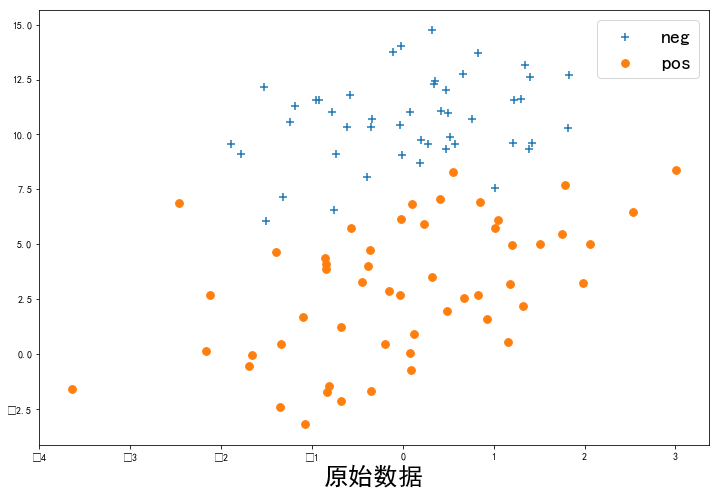

In [64]:
dataMat, labelMat = loadDataSet()
dataMat = np.array(dataMat)
labelMat = np.array(labelMat)
plotData(dataMat[:, 1:3], labelMat, xLabel=u'原始数据')

In [65]:
def sigmoid(z):
    '''
    定义sigmoid函数
    '''
    return (1.0/(1+np.exp(-z)))

In [66]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [67]:
def gradient(theta, X, y):
    '''
    梯度
    '''
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [68]:
def gradDesc(dataSet, labelSet, alpha=0.01, iterations=2000):
    '''
    逻辑回归梯度下降收敛函数
    参数：
        dataSet：数据集，带有截距项的数据集
        labelSet：标签集，单列向量
        alpha：学习率
        iterations：最大迭代次数
    返回：
        thetas：回归系数组
    '''
    m, n = dataSet.shape
    thetas = np.zeros((n, 1))
    thetaSet = []
    
    for i in range(iterations):
        grad = gradient(thetas, dataSet, labelSet)
        thetas = thetas - alpha*grad.reshape(-1, 1)
        thetaSet.append(thetas)
    return thetas, thetaSet

def gradAscent(dataMatIn, classLabels, alpha=0.01, maxCycles=1500):
    '''
    梯度上升
    '''
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    weights = np.zeros((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + 1/m*alpha * dataMatrix.transpose()* error #matrix mult
    return np.array(weights)

### 梯度下降分类，绘制决策边界

[[ 3.90548504]
 [ 0.46094335]
 [-0.58933895]]


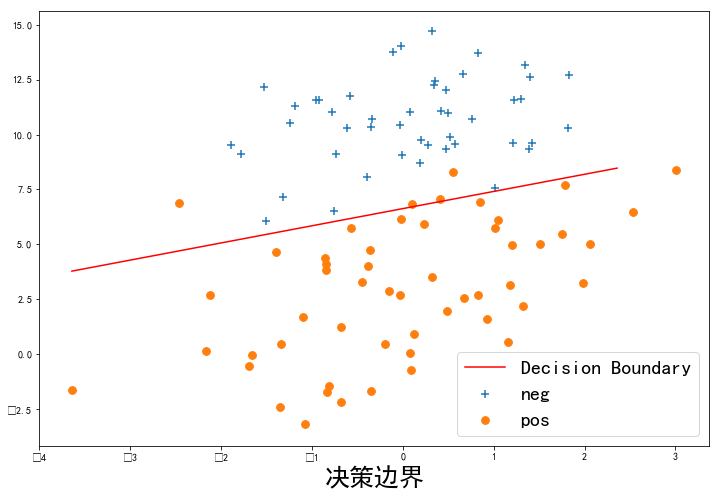

In [70]:
dataMat = np.array(dataMat)
labelMat = np.array(labelMat)
res, thSet = gradDesc(dataSet=dataMat, labelSet=labelMat.reshape(-1, 1), alpha=0.1, iterations=500)
print(res)
plotData(dataMat[:, 1:3], labelMat, xLabel=u'决策边界', thetas=res.reshape(1, -1)[0])

### 回归系数变化曲线

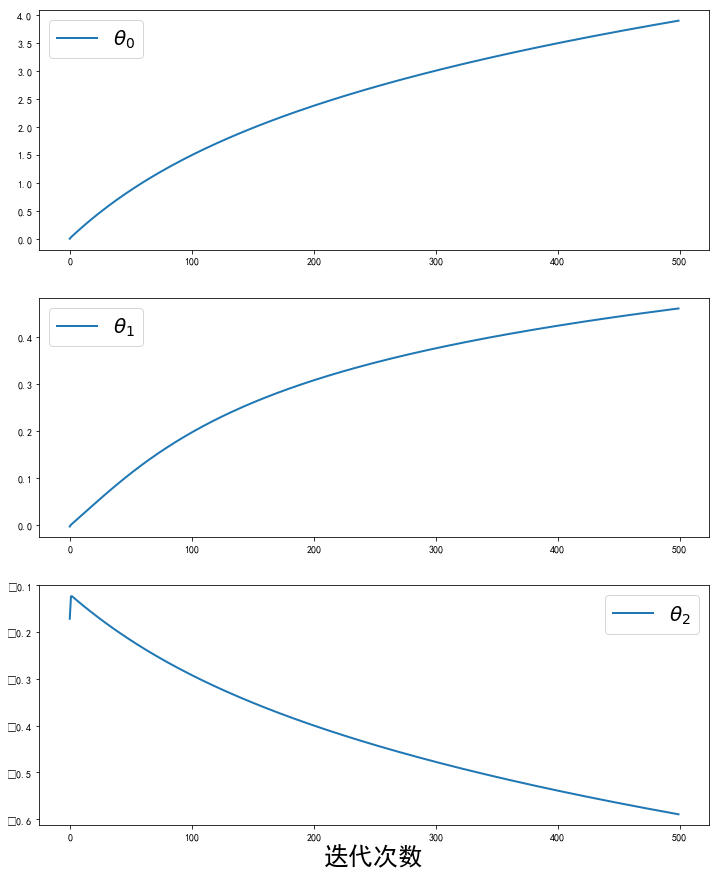

In [71]:
thSet = np.array(thSet)

fig1 = plt.figure(figsize=(12,15))
ax1 = fig1.add_subplot(311)
ax1.plot(thSet[:, 0], linewidth=2, label='$\\theta_0$')
ax1.legend(fontsize=20)

ax2 = fig1.add_subplot(312)
ax2.plot(thSet[:, 1], linewidth=2, label='$\\theta_1$')
ax2.legend(fontsize=20)#显示图例

ax3 = fig1.add_subplot(313)
ax3.plot(thSet[:, 2], linewidth=2, label='$\\theta_2$')
ax3.set_xlabel(u'迭代次数', fontsize=25)
ax3.legend(fontsize=20)#显示图例

plt.show()
plt.close()

### 使用梯度上升函数

[[ 3.90251978]
 [ 0.46067388]
 [-0.58896607]]


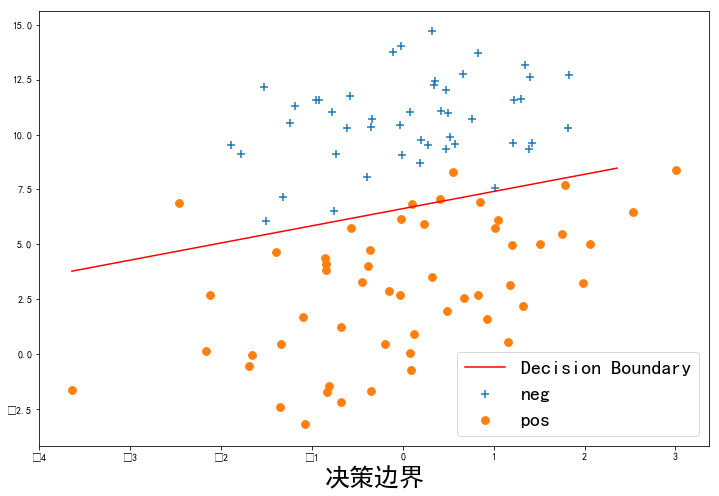

In [72]:
dataMat = np.array(dataMat)
labelMat = np.array(labelMat)
a = gradAscent(dataMat, labelMat, maxCycles=5000)
print(a)
plotData(dataMat[:, 1:3], labelMat, xLabel=u'决策边界', thetas=a.reshape(1, -1)[0])

### 调用scipy里面的最小化损失函数的minimize函数

In [73]:
a = np.array(dataMat)
b = np.array(labelMat).reshape(-1, 1)
thetas = np.zeros((a.shape[1]))
res = minimize(costFunction, thetas, args=(a,b), method=None, jac=gradient, options={'maxiter':400})
res

      fun: 0.09315760569213748
 hess_inv: array([[1920.49328838,  128.0193154 , -256.56981171],
       [ 128.0193154 ,   33.15789249,  -18.06661053],
       [-256.56981171,  -18.06661053,   34.8904042 ]])
      jac: array([4.04145401e-07, 1.77064896e-07, 3.09112258e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 25
     njev: 27
   status: 0
  success: True
        x: array([14.75215398,  1.25358497, -2.0026716 ])

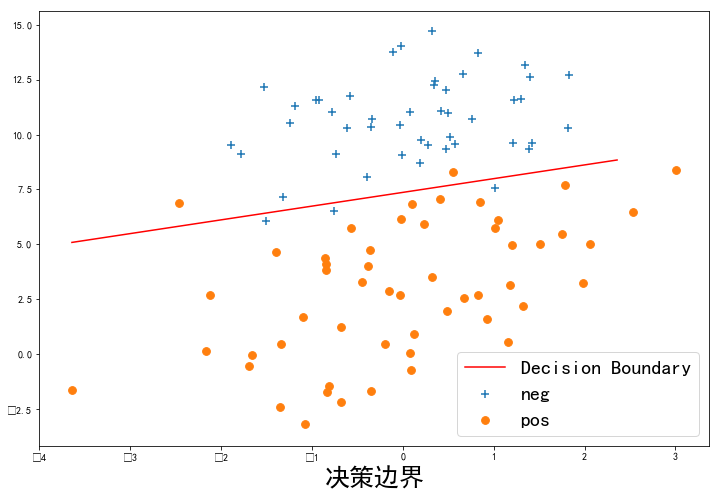

In [74]:
plotData(dataMat[:, 1:3], labelMat, xLabel=u'决策边界', thetas=res['x'])

### 算法预测及应用

In [75]:
def predict(theta, dataSet, threshold=0.5):
    p = sigmoid(dataSet.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [76]:
#单个数据测试
test = np.array([1, 2, 6])
print("Result of [1, 2, 6]: ", predict(res.x, test))
prob = sigmoid(np.array([1, 2, 6]).dot(res.x.T))
print("Prob of [1, 2, 6]: ", prob)
#准确率测试
p = predict(res.x, dataMat)
err = sum(p!=labelMat.ravel())
print("Error Rate: %.2f%%" %((err/p.size)*100))

Result of [1, 2, 6]:  1
Prob of [1, 2, 6]:  0.9947449366448452
Error Rate: 5.00%


- ### 4.2线性不可分案例

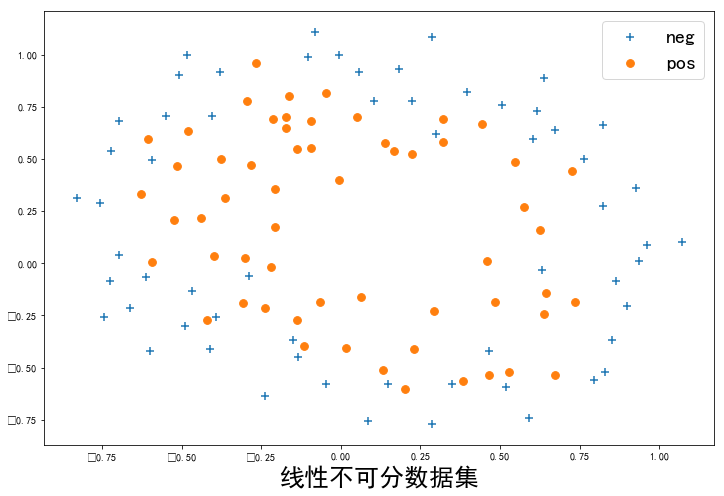

In [77]:
data42 = np.loadtxt("./CH06/data2.txt", delimiter=',')
y42 = data42[:, 2].reshape(-1, 1)
x42 = np.ones((y42.shape[0], 3))
x42[:, 1:3] = data42[:, 0:2]
thetas = np.zeros((x42.shape[1]))
# print(x[:10])
# print(y42[:10])
# print(thetas)
plotData(data42[:, 0:2], data42[:, 2], xLabel=u'线性不可分数据集')

In [78]:
# 生成多项式特征，最高6次项
poly = PolynomialFeatures(6)
x42x = poly.fit_transform(data42[:,0:2])
x42x.shape

(118, 28)

In [55]:
def costFunctionReg(theta, dataSet, labelSet, reg):
    m = labelSet.size
    h = sigmoid(dataSet.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(labelSet)+np.log(1-h).T.dot(1-labelSet)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [56]:
def gradientReg(theta, dataSet, labelSet, reg):
    m = labelSet.size
    h = sigmoid(dataSet.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*dataSet.T.dot(h-labelSet) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [57]:
def gradDescReg(dataSet, labelSet, alpha=0.01, reg=0, iterations=2000):
    '''
    逻辑回归梯度下降收敛函数
    参数：
        dataSet：数据集，带有截距项的数据集
        labelSet：标签集，单列向量
        alpha：学习率
        iterations：最大迭代次数
    返回：
        thetas：回归系数组
    '''
    m, n = dataSet.shape
    thetas = np.zeros((n, 1))
    thetaSet = []
    
    for i in range(iterations):
        grad = gradientReg(thetas, dataSet, labelSet, reg)
        thetas = thetas - alpha*grad.reshape(-1, 1)
        thetaSet.append(thetas)
    return thetas, thetaSet

In [58]:
def plotDataReg(dataSet, labelSet, xLabel=None, yLabel=None, negSimpleText='neg', posSimpleText='pos', thetas=None):
    neg = (labelSet == 0)
    pos = (labelSet == 1)

    fig1 = plt.figure(figsize=(12,8))
    ax1 = fig1.add_subplot(111)
    ax1.scatter(dataSet[neg][:,1], dataSet[neg][:,2], marker='+', s=100,label=negSimpleText)
    ax1.scatter(dataSet[pos][:,1], dataSet[pos][:,2], marker='o', s=100,label=posSimpleText)
    ax1.set_xlabel(xLabel, fontsize=25)
    if type(thetas) == type(np.array([])):
        x1_min, x1_max = dataSet[:,1].min(), dataSet[:,1].max(),
        x2_min, x2_max = dataSet[:,2].min(), dataSet[:,2].max(),
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(thetas))
        h = h.reshape(xx1.shape)
        ax1.contour(xx1, xx2, h, [0.5], linewidths=3, colors='g', label='Decision Boundary'); 
    ax1.legend(fontsize=20)#显示图例
    
    plt.show()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


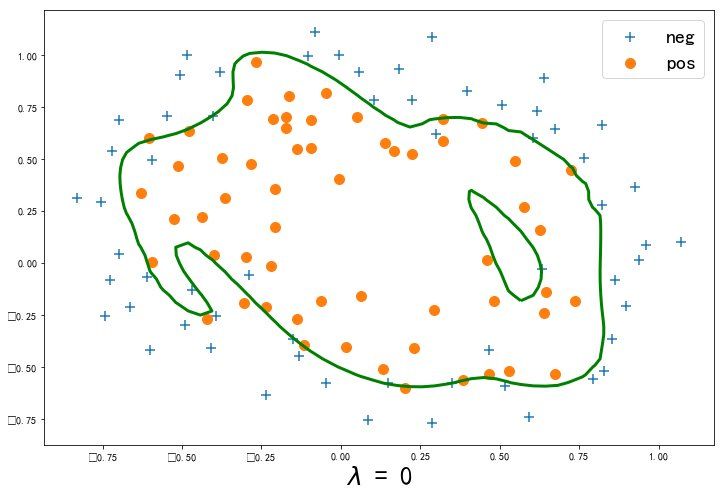

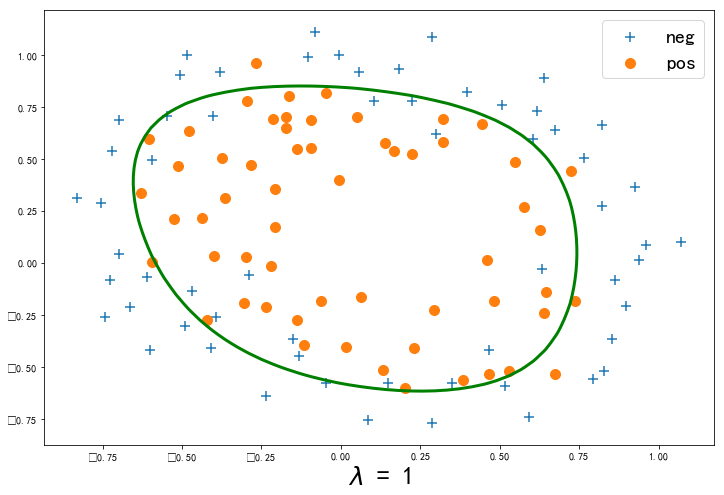

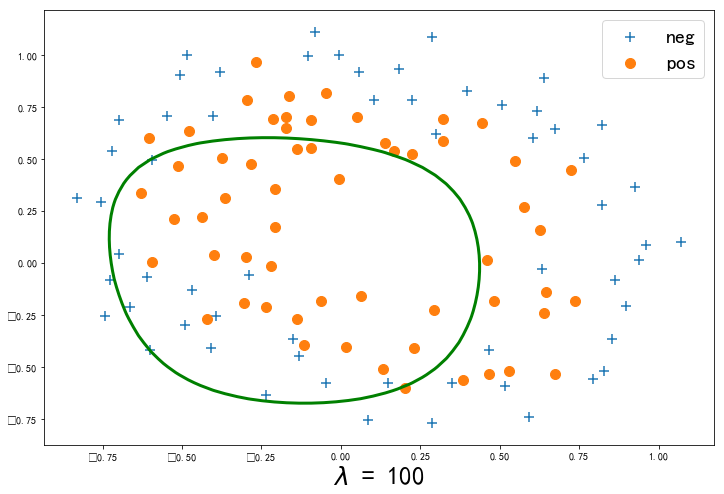

In [59]:
for i, reg in enumerate([0, 1, 100]):
    thetas = np.zeros(x42x.shape[1])
    result = minimize(costFunctionReg, thetas, args=(x42x, y42, reg), method=None, jac=gradientReg, options={'maxiter':3000})
    plotDataReg(x42x, data42[:, 2], thetas=result.x, xLabel='$\\lambda$ = {}'.format(reg))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


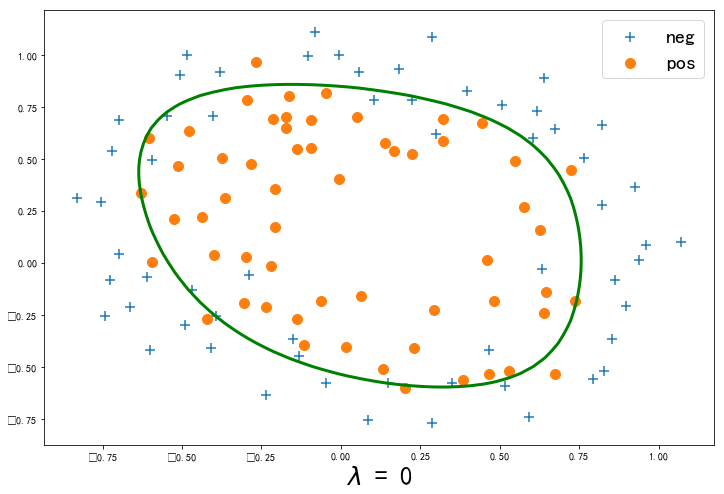

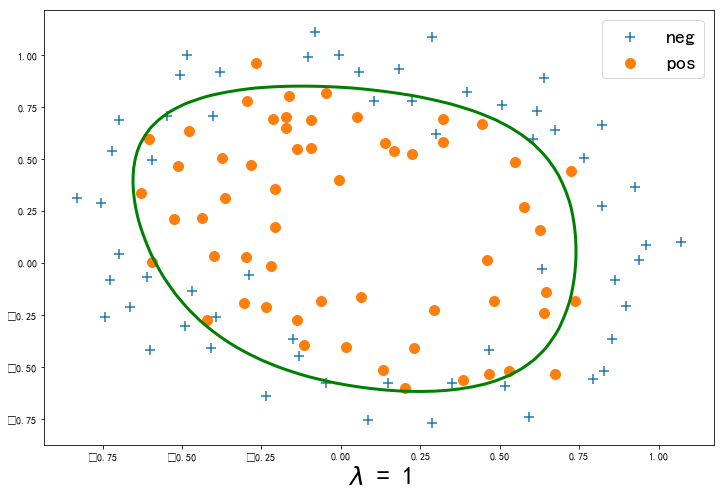

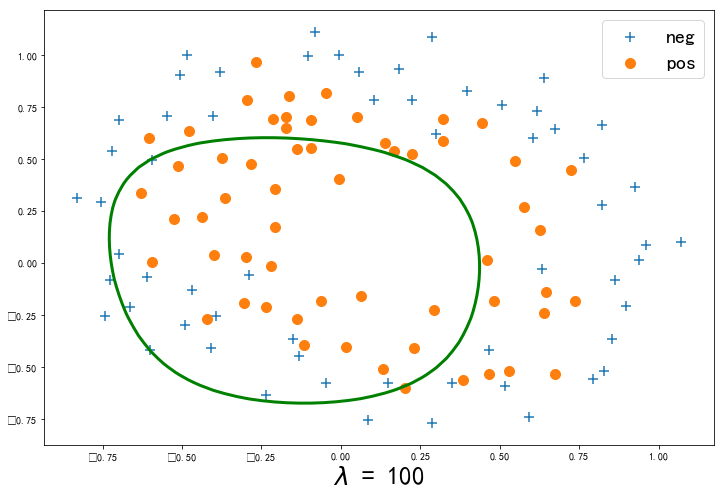

In [60]:
theats, theatSet = gradDescReg(x42x, y42, alpha=0.5, reg=0, iterations=500)
plotDataReg(x42x, data42[:, 2], thetas=theats, xLabel='$\\lambda$ = {}'.format(0))

for i, reg in enumerate([1, 100]):
    thetas = np.zeros(x42x.shape[1])
    theats, theatSet = gradDescReg(x42x, y42, alpha=0.5, reg=reg, iterations=500)
    plotDataReg(x42x, data42[:, 2], thetas=theats, xLabel='$\\lambda$ = {}'.format(reg))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


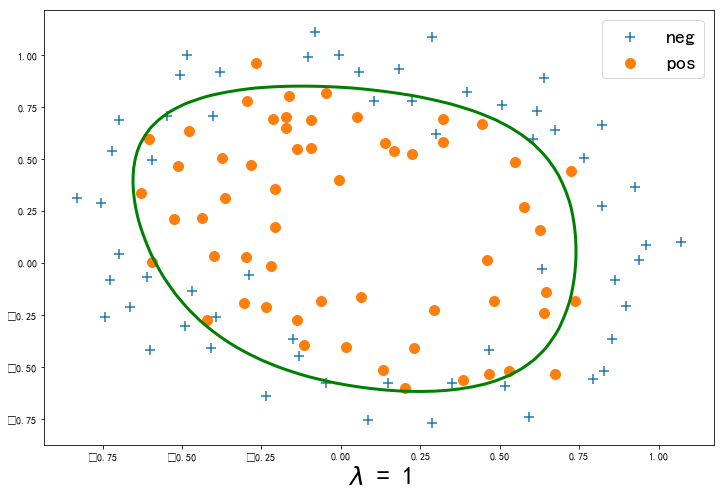

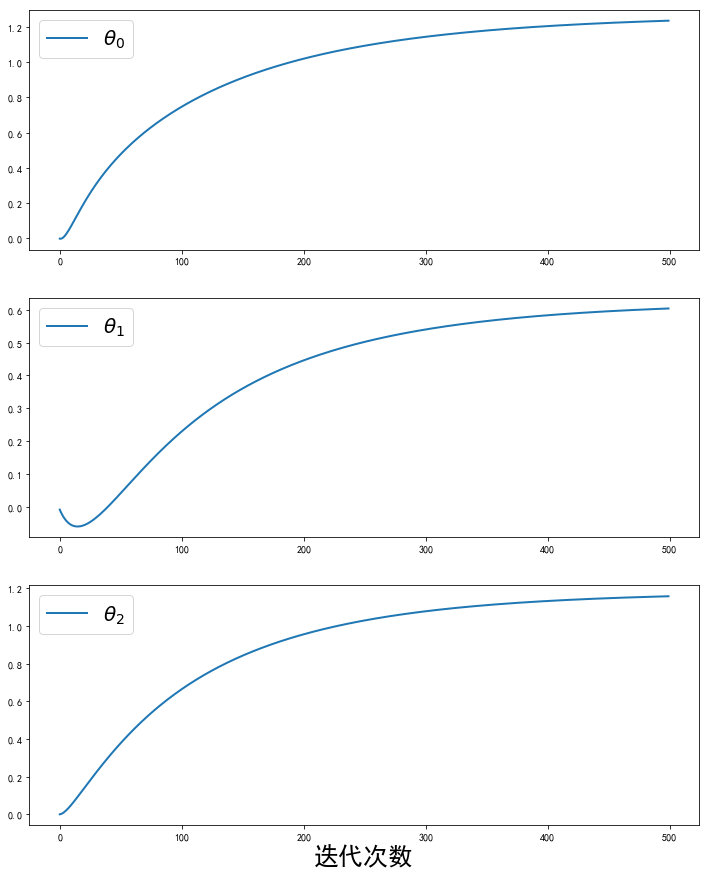

In [61]:
thetas = np.zeros(x42x.shape[1])
reg = 1
theats, theatSet = gradDescReg(x42x, y42, alpha=0.5, reg=reg, iterations=500)
plotDataReg(x42x, data42[:, 2], thetas=theats, xLabel='$\\lambda$ = {}'.format(reg))

thSet = np.array(theatSet)

fig1 = plt.figure(figsize=(12,15))
ax1 = fig1.add_subplot(311)
ax1.plot(thSet[:, 0], linewidth=2, label='$\\theta_0$')
ax1.legend(fontsize=20)

ax2 = fig1.add_subplot(312)
ax2.plot(thSet[:, 1], linewidth=2, label='$\\theta_1$')
ax2.legend(fontsize=20)#显示图例

ax3 = fig1.add_subplot(313)
ax3.plot(thSet[:, 2], linewidth=2, label='$\\theta_2$')
ax3.set_xlabel(u'迭代次数', fontsize=25)
ax3.legend(fontsize=20)#显示图例

plt.show()
plt.close()

# 5.参考
[1] 七月在线机器学习教程

[2] 麦子学院机器学习教程

[3] 百度百科

[4] http://lib.csdn.net/article/machinelearning/59572?knId=39

[5] 周志华，机器学习[M]，北京：清华大学出版社，2018.

[6] Peter Harrington著，李锐，李鹏，曲亚东，王斌 译, 机器学习实战[M]，北京：人民邮电出版社，2013.6.

[8] 李航，统计学习方法[M]，北京：清华大学出版社，2012.3.

[9] https://blog.csdn.net/juechenyi/article/details/77116011

[10] https://blog.csdn.net/thither_shore/article/details/52260742

[11] https://blog.csdn.net/tercel_w/article/details/62883704

[12] https://blog.csdn.net/theonegis/article/details/51037850

[13] Andrew Ng, 机器学习公开课：http://open.163.com/special/opencourse/machinelearning.html

# 6.附录

- ### 案例2，另一个数据集

In [24]:
def loadData(file, delimeter):
    '''
    加载数据
    '''
    data = np.loadtxt(file, delimiter=delimeter)
    return(data)

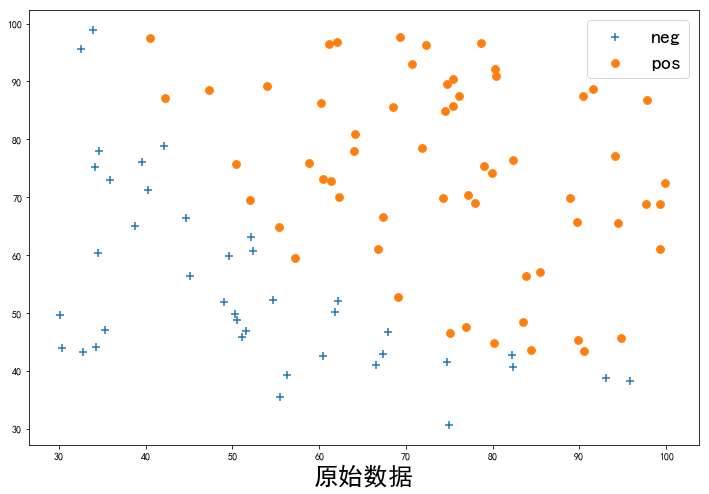

In [25]:
data = loadData('./CH06/data1.txt', ',')
plotData(data[:, 0:2], data[:, 2], xLabel=u'原始数据')

In [26]:
y = data[:, 2].reshape(-1, 1)
x = np.ones((y.shape[0], 3))
x[:, 1:3] = data[:, 0:2]
thetas = np.zeros((x.shape[1]))
# print(x[:10])
# print(y[:10])
# print(thetas)

[[-423.29695705]
 [   3.9088312 ]
 [   3.17410668]]


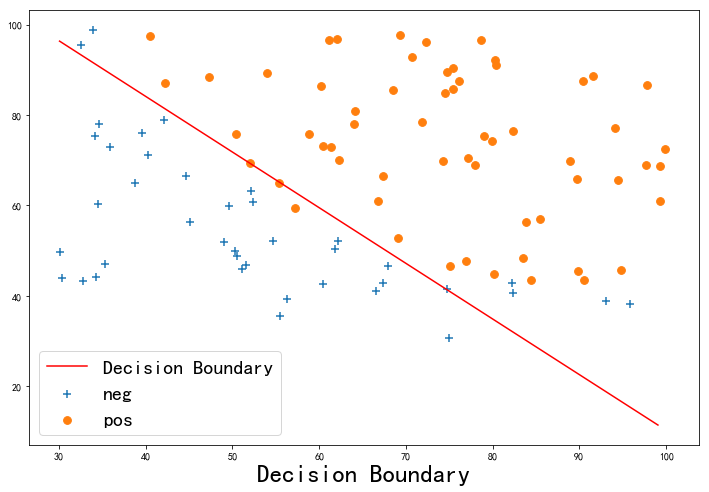

In [27]:
th, thSet = gradDesc(x, y, alpha=0.1, iterations=71000)
print(th)
plotData(data[:, 0:2], data[:, 2], xLabel=u'Decision Boundary', thetas=th.reshape(1, -1)[0])

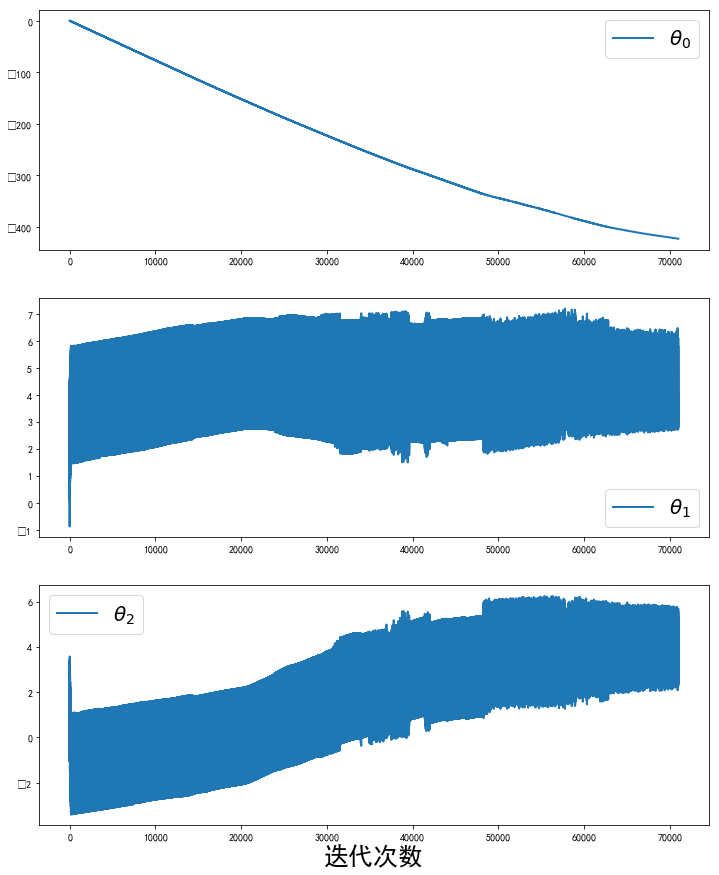

In [28]:
thSet = np.array(thSet)

fig1 = plt.figure(figsize=(12,15))
ax1 = fig1.add_subplot(311)
ax1.plot(thSet[:, 0], linewidth=2, label='$\\theta_0$')
ax1.legend(fontsize=20)

ax2 = fig1.add_subplot(312)
ax2.plot(thSet[:, 1], linewidth=2, label='$\\theta_1$')
ax2.legend(fontsize=20)#显示图例

ax3 = fig1.add_subplot(313)
ax3.plot(thSet[:, 2], linewidth=2, label='$\\theta_2$')
ax3.set_xlabel(u'迭代次数', fontsize=25)
ax3.legend(fontsize=20)#显示图例

plt.show()
plt.close()

In [29]:
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
#直接调用scipy里面的最小化损失函数的minimize函数
res = minimize(costFunction, thetas, args=(x,y), method=None, jac=gradient, options={'maxiter':400})
res

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.20349770158950983
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557630e-09,  4.36433479e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

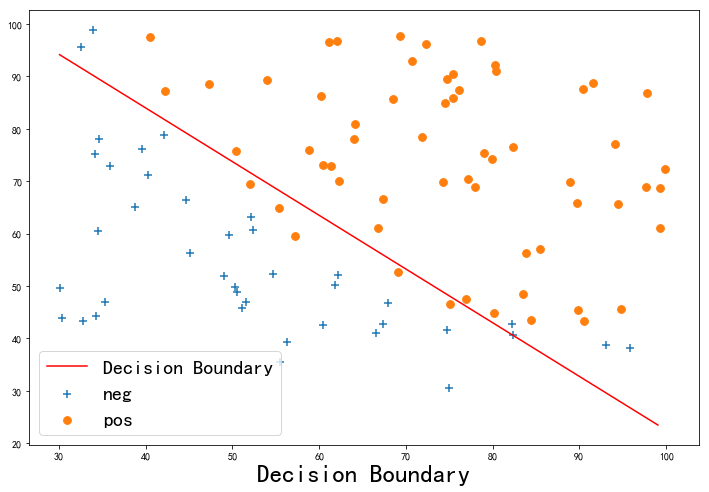

In [30]:
plotData(data[:, 0:2], data[:, 2], xLabel=u'Decision Boundary', thetas=res['x'])